**Развлекательное приложение Procrastinate Pro+**  
Разработано и запущено приложение под названием Procrastinate Pro+.  Несмотря на усердия маркетологов по рекламированию этого приложения, оно остается убыточным. 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
1.лог сервера с данными об их посещениях,  
2.выгрузка их покупок за этот период,  
3.рекламные расходы.  

**Цель исследования** — определить причину убыточности приложения и предложить на основании проведенного анализа рекомендации по выходу на получение прибыли.

**Ход исследования**

Данные для исследования находятся в трех файлах:  
`visits_info_short.csv` - здесь находится информация о посещениях сайта  
`orders_info_short.csv` - в этом файле размешена информация о заказах  
`costs_info_short.csv` - информация о расходах на рекламу.  

Нам необходимо будет загрузить данные и изучить их, проверить на пропуски и дубликаты. После этого зададим необходимые функции для расчета нескольких метрик (LTV, ROI), удержания и конверсиии. Далее приступить к исследовательскому анализу данных: составить профили пользователей, изучить из каких стран, какими устройствами и через какие каналы продаж приходят пользователи в приложение. После исследования перейдем к расчетам трат на маркетинг, сгруппируем эти траты по стране, устройству и каналу продаж. Наконец оценим окупаемость рекламы  и сформируем рекомендации для отдела маркетинга. 


Таким образом, исследование пройдёт в шесть этапов:
 1. Подготовка данных к анализу.
 2. Прописать функции для расчета и анализа.
 3. Проведение исследовательского анализа данных.
 4. Расчеты затрат на маркетинг.
 5. Проведение оценки окупаемости рекламы.
 6. Формирование вывода и рекомендаций для отдела маркетинга.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# прочитаем данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

###### Переходим к изучению общей информации

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


###### Сейчас посмотрим еще на пропуски и на дубликаты (если они есть). Пока исходя из данных вижу, что необходимо поменять тип данных на datetime и не думаю, что найду пропуски и дубликаты , но проверю все равно. 

In [9]:
# смотрю долю пропусков
visits.isna().mean()

User Id          0.0
Region           0.0
Device           0.0
Channel          0.0
Session Start    0.0
Session End      0.0
dtype: float64

In [10]:
orders.isna().mean()

User Id     0.0
Event Dt    0.0
Revenue     0.0
dtype: float64

In [11]:
costs.isna().mean()

dt         0.0
Channel    0.0
costs      0.0
dtype: float64

In [12]:
# ожидаемо пропуски отсутствуют, теперь смотрю дубликаты
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

###### Пропуски и дубликаты отсутствуют. Приведем столбцы Session Start, Session End, Event Dt и dt	в формат datetime

In [15]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [16]:
visits.dtypes

User Id                   int64
Region                   object
Device                   object
Channel                  object
Session Start    datetime64[ns]
Session End      datetime64[ns]
dtype: object

In [17]:
orders.dtypes

User Id              int64
Event Dt    datetime64[ns]
Revenue            float64
dtype: object

In [18]:
costs.dtypes

dt          object
Channel     object
costs      float64
dtype: object

##### Вывод : Внимательно изучили данные с датафреймов, проверили на пропуски и дубликаты и привели в соответствие типы данных. Теперь все готово к нашему дальнейшему исследованию. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

###### Соберём функции для создания профилей, расчёта и анализа LTV, ROI, удержания и конверсии, а также функции для построения графиков

In [19]:
# зададим функцию для создания профилей

def get_profiles(visits, orders, costs):

    profiles = (
        visits.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg(
            {
                'Session Start': 'first',
                'Channel': 'first',
                'Device': 'first',
                'Region': 'first',
            }
        )
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )
    

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())


    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})
        .rename(columns={'User Id': 'unique_users'})
        .reset_index()
    )

    costs = costs.merge(new_users, on=['dt', 'Channel'], how='left')

    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    profiles = profiles.merge(
        costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
# теперь функцию для расчета удержанния

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['User Id', 'Session Start']], on='User Id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [21]:
# следующая функция для расчета конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['User Id', 'Event Dt']], on='User Id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
    
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [22]:
# функция для расчета LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        purchases[['User Id', 'Event Dt', 'Revenue']], on='User Id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['User Id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)
        
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  
        result_grouped,  
        result_in_time,  
        roi_grouped,  
        roi_in_time,  
    ) 

In [23]:
# перейдем к функции построения графиков
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [24]:
# график удержания

def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
        
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)

    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [25]:
# график конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [26]:
# график визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

###### Мы записали функции, теперь перейдем непосредственно к исследованию.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [27]:
# составим профили

profiles = get_profiles(visits, orders, costs)
print(profiles.head(15)) 

     User Id            first_ts         Channel   Device         Region  \
0     599326 2019-05-07 20:58:57        FaceBoom      Mac  United States   
1    4919697 2019-07-09 12:46:07        FaceBoom   iPhone  United States   
2    6085896 2019-10-01 09:58:33         organic   iPhone         France   
3   22593348 2019-08-22 21:35:48      AdNonSense       PC        Germany   
4   31989216 2019-10-02 00:07:44         YRabbit   iPhone  United States   
5   34186288 2019-05-09 17:29:23         organic  Android  United States   
6   38448301 2019-08-16 11:56:00         organic  Android  United States   
7   46006712 2019-06-30 03:46:29      AdNonSense  Android         France   
8   58263264 2019-05-11 19:18:43        FaceBoom   iPhone  United States   
9   59835779 2019-05-11 21:13:47    MediaTornado   iPhone  United States   
10  62222884 2019-06-19 15:14:57         organic   iPhone        Germany   
11  64614231 2019-10-22 09:51:19         organic  Android             UK   
12  69985732

In [28]:
# устанавливаем момент и горизонт анализа данных (из задачи)
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14

In [29]:
# максимальную и минимальную дату привлечения 
min_acquisition_date = costs['dt'].min()
min_acquisition_date

datetime.date(2019, 5, 1)

In [30]:
max_acquisition_date= observation_date - timedelta(days=horizon_days - 1)
max_acquisition_date

datetime.date(2019, 10, 19)

###### Мы установили момент 1 ноября 2019 и горизонт анализа данных для дальнейшего нашего исследования. Также определили минимальную дату привлечения - 1 мая 2019  и максимальную дату - 19 октября 2019. Эти даты полностью соответствуют нашему ТЗ.

In [31]:
# строю таблицу, отражающую количество пользователей и долю платящих из каждой страны.

profiles_gr = profiles.groupby('Region').agg({'User Id' : 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
profiles_gr['payer'] = profiles_gr['payer'] * 100
profiles_gr

,User Id,payer
Region,,
United States,100002,6.901862
Germany,14981,4.111875
UK,17575,3.982930
France,17450,3.799427


###### Согласно построенной таблице в лидерах Соединенные Штаты Америки, у них больше всех пользователей (в разы) и самая высокая доля платящих (почти 70%). Остальные страны примерно находятся в равных позициях , доля платящих колеблется от 39% до 41% и количество платящих  во Франции с Великобританией почти одинаково, а Германия отстает на 2500 тысячи пользователей.

In [32]:
# теперь посмотрим , что у нас с девайсами: 

profiles_dv = profiles.groupby('Device').agg({'User Id' : 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
profiles_dv['payer'] = profiles_dv['payer'] * 100
profiles_dv

,User Id,payer
Device,,
Mac,30042,6.364423
iPhone,54479,6.207897
Android,35032,5.851793
PC,30455,5.046790


###### Самая высокая доля платящих у пользователей Mac, но при этом самое маленькое число пользователей. Любопытное распределение, у айфона число пользователей намного больше чем Mac, но доля платящих такая же. Я думаю через Mac удобнее пользоваться приложением, и думаю что при увеличении пользователей Mac возможно можно увеличить долю еще больше платящих. У андроида и ПК доли чуть ниже (особенно у ПК) при количестве пользователей почти таком же как у Mac.

In [33]:
# наконец посмотрим на каналы привлечения

profiles_ch = profiles.groupby('Channel').agg({'User Id' : 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
profiles_ch['payer'] = profiles_ch['payer'] * 100
profiles_ch

,User Id,payer
Channel,,
FaceBoom,29144,12.204914
AdNonSense,3880,11.340206
lambdaMediaAds,2149,10.469986
TipTop,19561,9.600736
RocketSuperAds,4448,7.913669
WahooNetBanner,8553,5.296387
YRabbit,4312,3.826531
MediaTornado,4364,3.574702
LeapBob,8553,3.063253


###### В топ-3 с долями платящих пользователей вошли FaceBoom, AdNonSense, lambdaMediaAds по 12%, 11% и 10% соответственно. При этом из "платных" каналов, через FaceBoom пришло самое большее количество пользователей. А самое большое количество пришло через бесплатный канал. Его доля равна 2%, но это самые "дешевые" пользователи. 

##### Вывод: проведя небольшое исследование было определено, что самая большая доля платящих пользователей проживает в США, самый популярный девайс это Mac среди платящих и привлечены они через FaceBoom. Если учесть, все эти три фактора, можно сделать вывод - что это прям портрет типичного американца. Итоговое расположение по странам следующее : 1) United States 2)Germany 3) UK. По девайсам : 1)Mac 2) iPhone 3) Android. Каналы привлечения расположились следующим образом : 1)FaceBoom 2)AdNonSense 3)lambdaMediaAds	

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [34]:
# посчитаем общую сумму расходов на маркетинг

costs_sum = round(costs['costs'].sum(),2)
costs_sum

105497.3

In [35]:
# теперь выясним сколько денег потратили на каждый источник

costs.groupby('Channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
Channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [36]:
# создаем отдельные столбцы
costs['week'] = pd.to_datetime(costs['dt']).dt.week
costs['month'] = pd.to_datetime(costs['dt']).dt.month


/tmp/ipykernel_727/980919238.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  costs['week'] = pd.to_datetime(costs['dt']).dt.week


Text(0, 0.5, 'Стоимость')

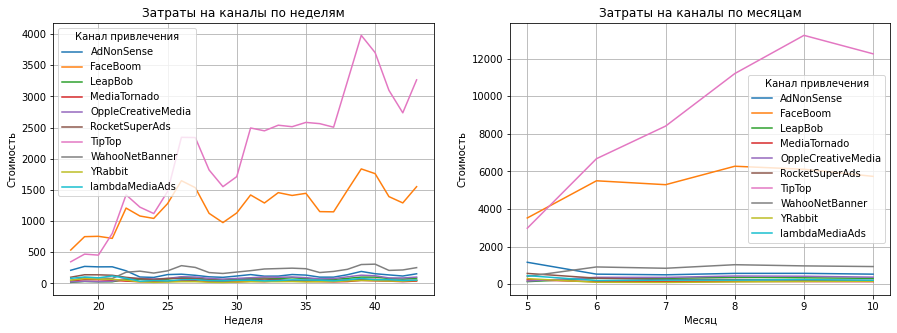

In [37]:
# строим визуализацию 
ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(index='week', columns='Channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax=ax1)
plt.legend(title='Канал привлечения')
ax1.set_title('Затраты на каналы по неделям')
plt.xlabel('Неделя')
plt.ylabel('Стоимость')

ax2 = plt.subplot(1, 2, 2)
costs.pivot_table(index='month', columns='Channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 5), ax=ax2)
plt.legend(title='Канал привлечения')
ax2.set_title('Затраты на каналы по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')

In [38]:
# дальше узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
profiles = get_profiles(visits, orders, costs)
profiles

,User Id,first_ts,Channel,Device,Region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [39]:
cac = (
    profiles.groupby('Channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

,cac
Channel,
AdNonSense,1.008054
FaceBoom,1.113286
LeapBob,0.210172
MediaTornado,0.218717
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
TipTop,2.799003
WahooNetBanner,0.602245
YRabbit,0.218975


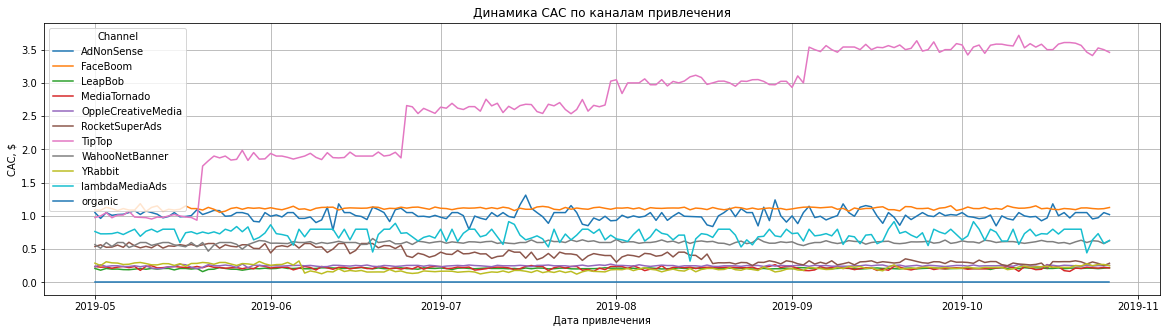

In [40]:
profiles.pivot_table(
    index='dt', columns='Channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(20, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

##### Вывод: Была определена общая сумма затрат на маркетинг, которая составила 105 497,3. Также распределили затраты по каналам привлечения. Топ - 3 канала : 1) TipTop (затраты - 54 751,30); 2)FaceBoom	(затраты - 32 445,60); 3)WahooNetBanner (затраты - 5 151,00). При построении графика динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику наши выводы по топ-3 каналу подтвердились. Дополнительно посчитав показатель САС (стоимость клиента) мы также выявили тех же лидеров по "дороговизне" клиента. Самый дорогой клиент у TipTop (10), потом FaceBoom (6) и наконец WahooNetBanner (1,08). Все по мне логично. Посмотрим на дальнейшие метрики. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [41]:
# исключаем "бесплатных" пользователей

profiles = profiles.query('Channel != "organic"')

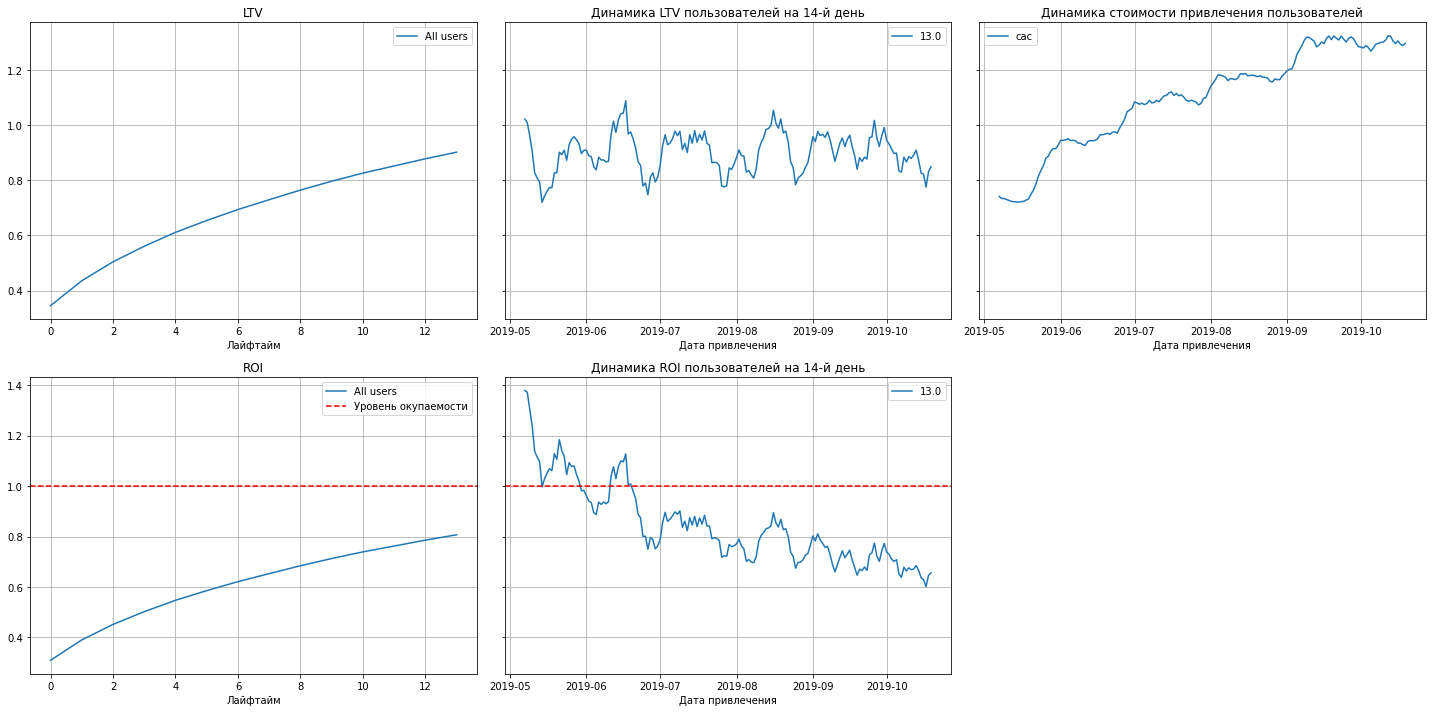

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


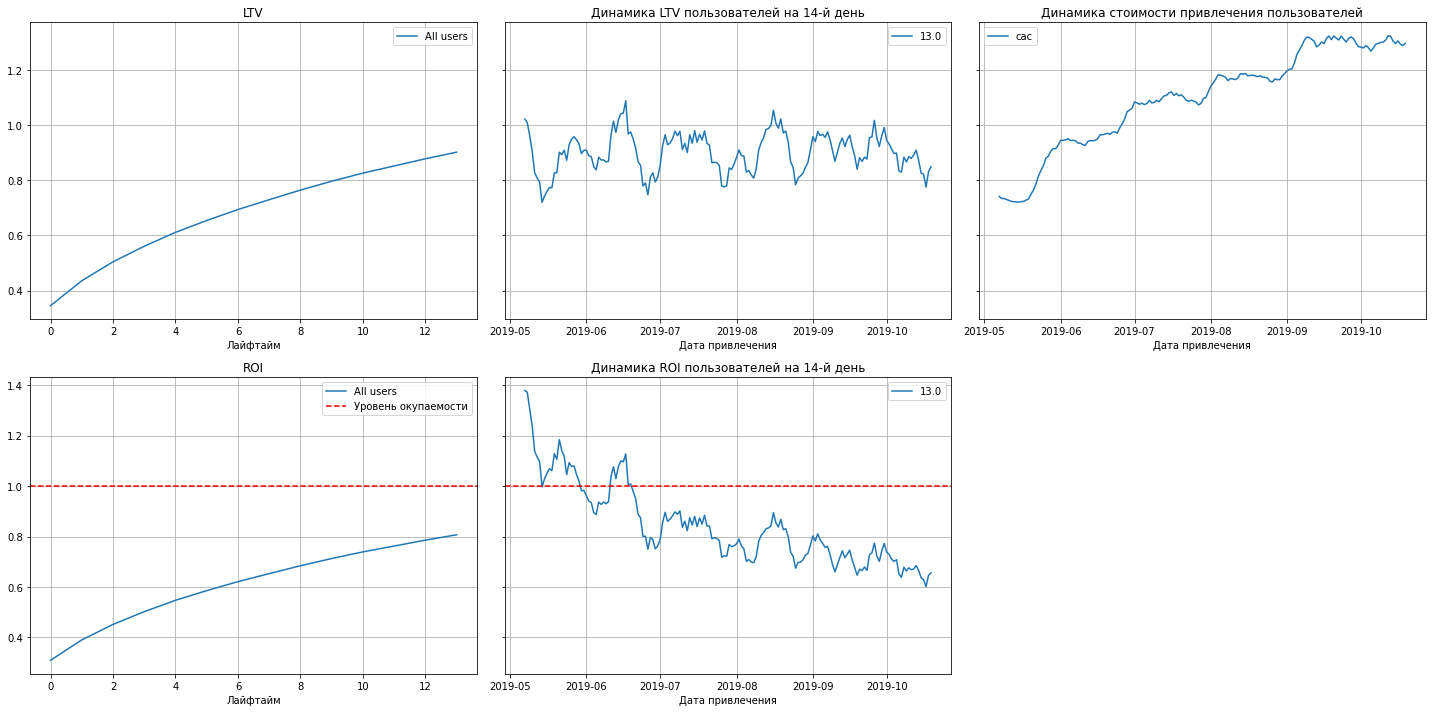

In [43]:
# переходим к построению графиков. Анализируем окупаемость рекламы c помощью графиков LTV и ROI, 
# а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)



##### Вывод: Реклама не окупается. ROI по истечении 14 дней доходит всего до 80%. Если посмотреть графики динамики стоимости привлечения пользователей и динамики ROI  показатели только снижаются, при этом стоимость привлечения растет. Один положительный момент, LTV растет , что показывает нам повышения качества пользователей. 

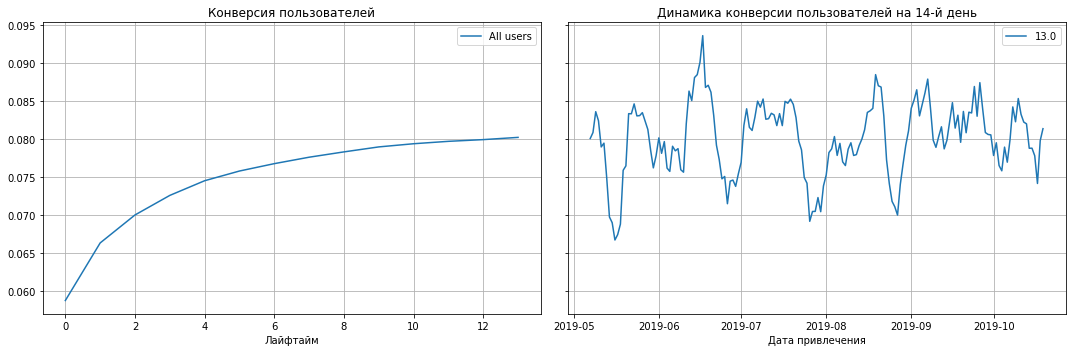

In [44]:
# теперь посчитаем конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)



##### Вывод: Конверсия растет вначале, но далее дойдя до 80% она переходит в стагнацию. Судя по динамике тоже день ко дню все переходит в стабильную стагнацию. Пользователи готовы платить и пользоваться в начале использования, но по истечению времени (12 дней) они теряют интерес. 

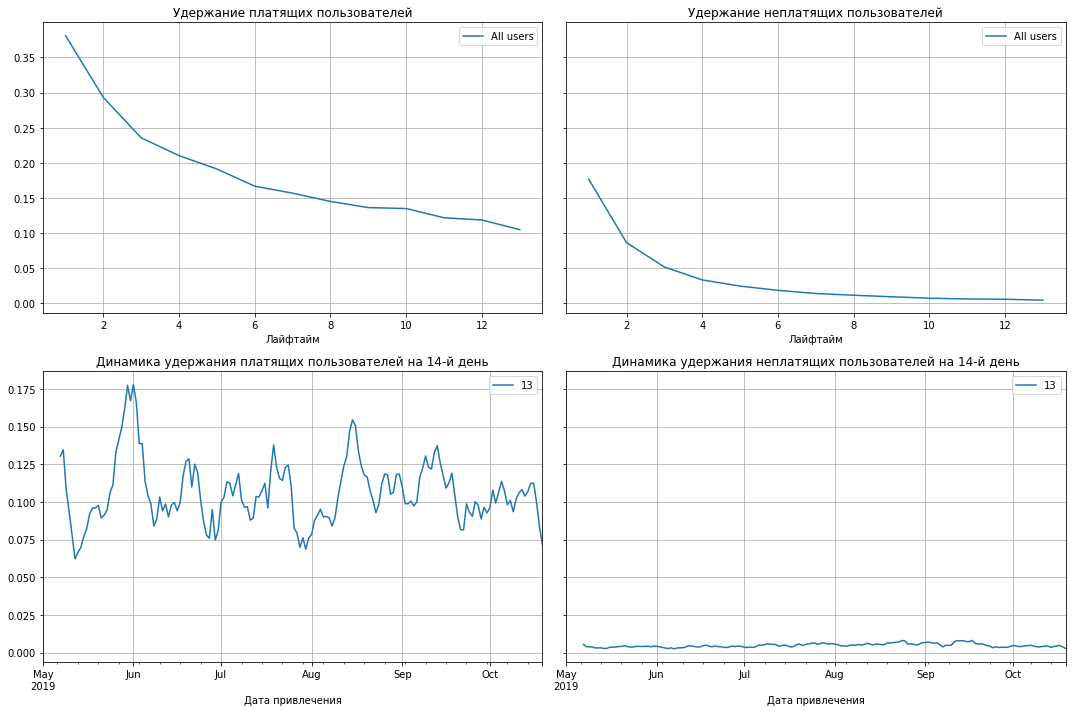

In [45]:
# теперь посчитаем удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

##### Вывод: Удержание стабильно падает, как у платящих так и не платящих. Динамика это подтверждает. Тут прям ситуация взаимосвязана с конверсией, в том смысле , что вначале пользователи готовы платить, удерэиваются, но после 12 дней они разочаровываются и не возвращаются и со временем "уходят". 

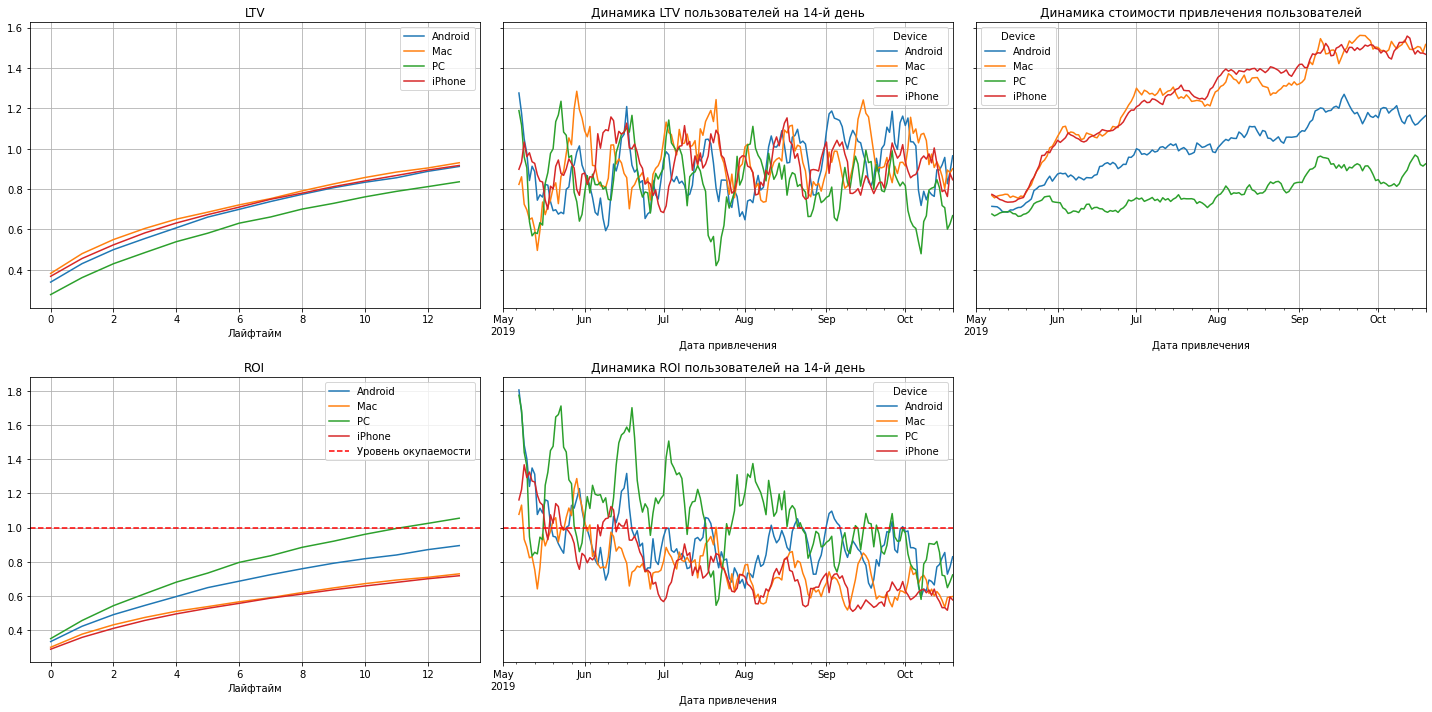

In [46]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['Device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


##### Вывод: При разбивке по девайсам уже видим окупаемость на 11 день у PC. В целом фигура повторяет общий расчет окупаемости, но есть уже интересные моменты. При сильном увеличении стоимости привлечения пользователей iPhone и Mac они не окупаются и по динамике ниже всех. На лицо явная проблема с Apple. Слишком большие затраты , а результат отсуствует.  

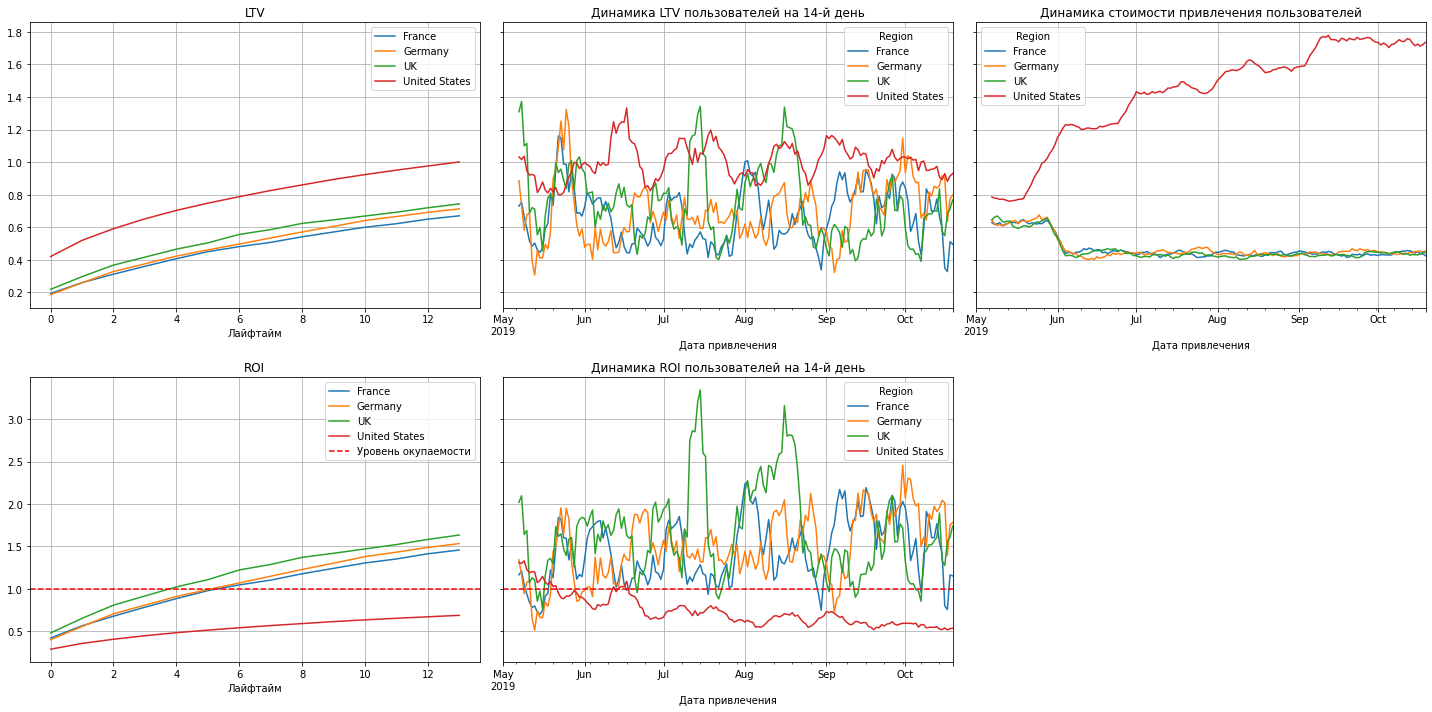

In [47]:
# смотрим окупаемость с разбивкой по странам
dimensions = ['Region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

##### Вывод: Выявив интересный момент с Apple уже можно смотря на графики по странам сказать, что на лицо есть какая-то группа пользователей. При повторении фигур графиков по странам с общим графиком мы видим, что пользователи из США единственные кто не окупаются, и единственные по динамике снижаются ниже уровня окупаемости. При этом стоимость привлечения расчет. Отмечу, что Apple очень популярен в США. 

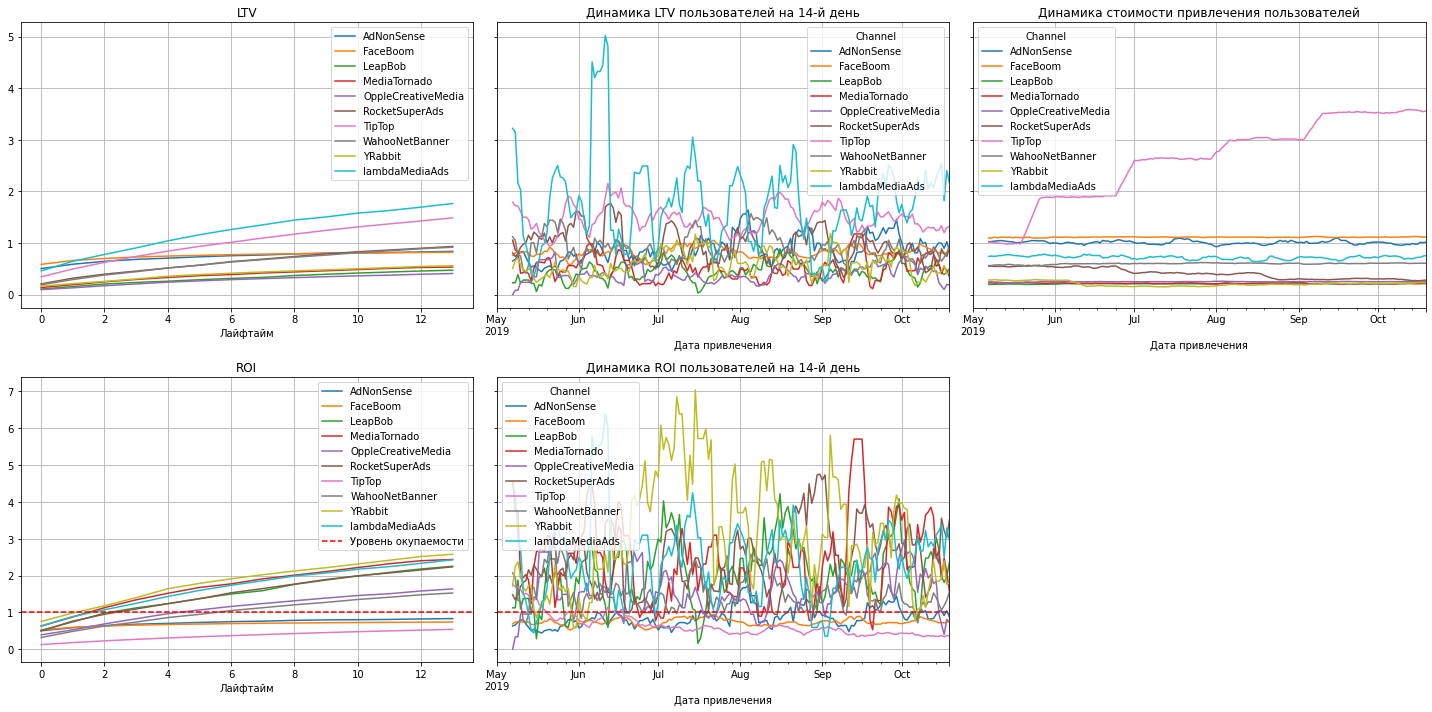

In [48]:
# смотрим окупаемость с разбивкой по каналам
dimensions = ['Channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

##### Вывод: По окупаемости каналов продаж LTV растет согласно общему графику, и у большинства каналов реклама окупаеться. Выделяется только TipTop стоимость привлечения которого очень высока, но не окупаема (возможно как раз из-за того, что дорого и сложнее окупается). Также FaceBoom и LeapBob не окупаются наравне с TipTop. Возможно стоит приглядеться по ближе к этим трем каналам продаж. 

#### Вывод: Таким образом, на основании вышеизложенного можно сделать вывод, что в целом реклама не окупается. При этом тянет вниз ROI пользователи из США использующие девайсы на платформах компании Apple. И не рентабельны абсолютно вложения в такие каналы продаж как TipTop, FaceBoom и LeapBob.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**При выполнении задачи была проанализирована маркетинговая политика развлекательного приложения Procrastinate Pro+. При выявлении доли платящих был выявлен лидер в лице Соединенных Штатов Америки, у них больше всех пользователей (в разы) и самая высокая доля платящих (почти 70%). А самое большее количество пользователей использует iPhone (54479). По каналам продаж топ-3 с долями платящих пользователей вошли FaceBoom, AdNonSense, lambdaMediaAds по 12%, 11% и 10% соответственно, но TipTop был на втором месте по количеству пользователей. Рассчитав затраты на маркетинг мы определили топ - 3 канала:** 

1) TipTop (затраты - 54 751,30); 

2)FaceBoom (затраты - 32 445,60); 

3)WahooNetBanner (затраты - 5 151,00). 

**У них же самый дорогой клиент (у TipTop (10), потом FaceBoom (6) и наконец WahooNetBanner (1,08)).  По итогу анализа окупаемости и выявления общих затрат на рекламу отделку маркетинга следует просмотреть свои траты на такие каналы продаж как TipTop и FaceBoom, целесообразно ли при отсутствии окупаемости (или низкой окупаемости) тратить только средств. Также необходимо пересмотреть свою маркетинговую стратегию в США и думаю необходимо снизить расходы на рекламу. Дополнительно следует проверить на технические проблемы при использовании девайсов компании Apple, если все в порядке, пересмотреть стратегию. Возможно приложение плохо работает на этих девайсах.** 

**Также при рассмотрении графиков можно обратить внимание на каналы YRabbit и RocketSuperAds. Их динамика стоимости привлечения клиентов на стабильном низком уровне, при этом окупаемость у обоих на самом высоком уровне. При низких затратах получить клиентов через их каналы с постоянным и самым сильным растущим LTV. По моему мнению стоит обратить на них внимание.**